## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('concrete_data.csv')

print(dataset.shape)

(1030, 9)


In [3]:
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Missing Values

In [4]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

In [5]:
dataset.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Numerical Variables

In [7]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))


dataset[numerical_features].head()

Number of numerical variables:  9


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Discrete Variables

In [8]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [9]:
discrete_feature

['Age']

In [10]:
dataset[discrete_feature].head()

,Age
0,28
1,28
2,270
3,365
4,360


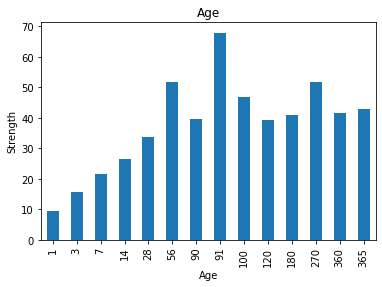

In [11]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Strength'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Strength')
    plt.title(feature)
    plt.show()

### Continous Variable

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 8


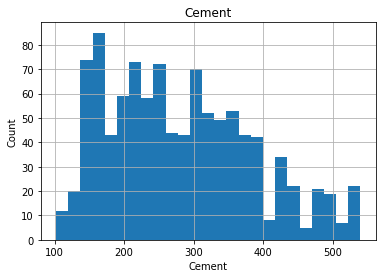

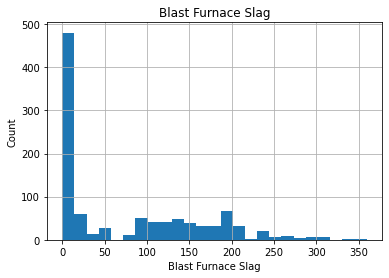

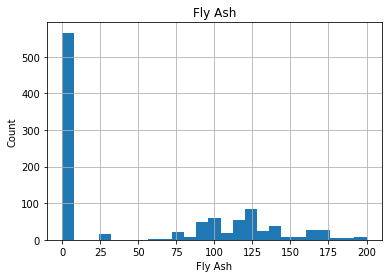

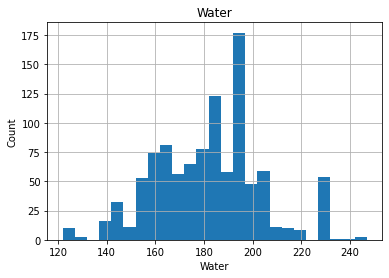

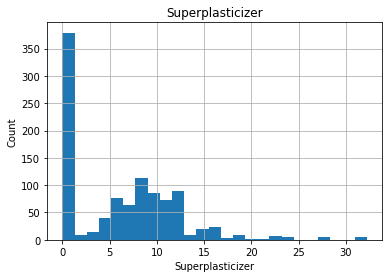

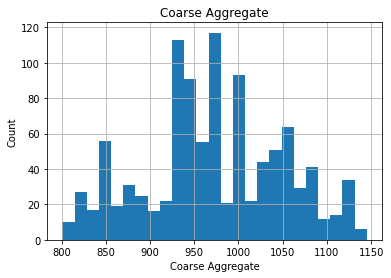

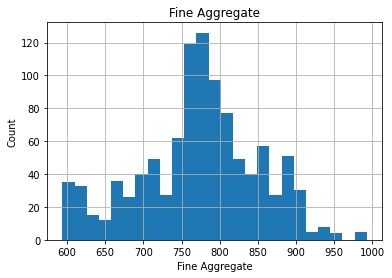

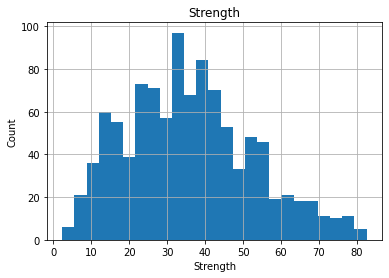

['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Strength']


In [13]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    
print(continuous_feature)

### Logarithmic Tranformation

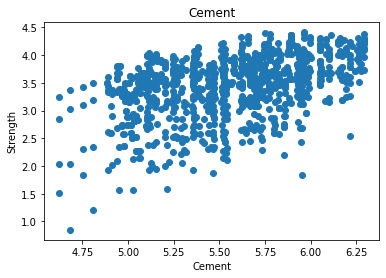

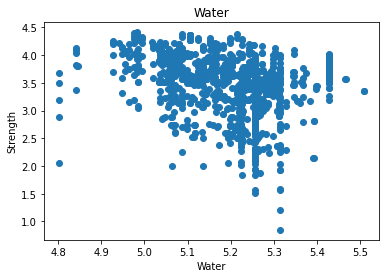

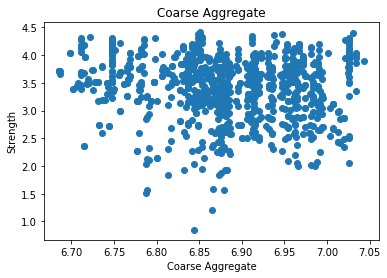

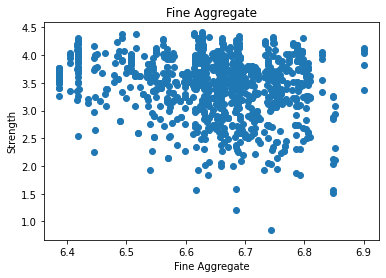

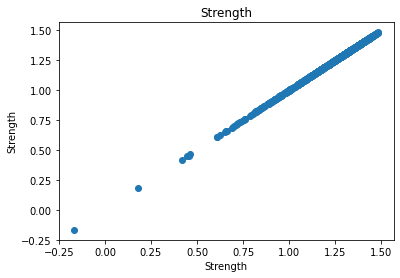

In [14]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Strength']=np.log(data['Strength'])
        plt.scatter(data[feature],data['Strength'])
        plt.xlabel(feature)
        plt.ylabel('Strength')
        plt.title(feature)
        plt.show()

### Outliers

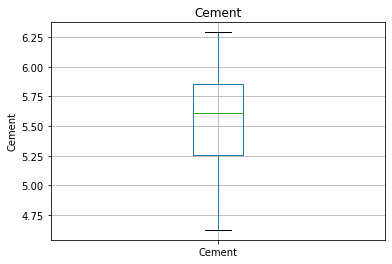

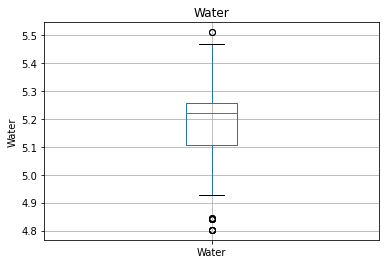

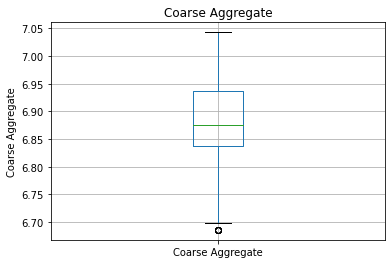

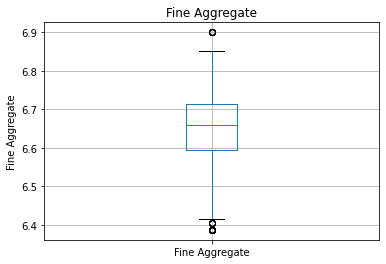

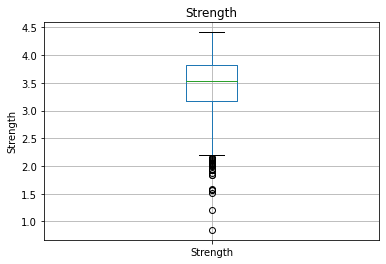

In [15]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical features

In [16]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

[]

## Feature Engineering

In [17]:
num_features=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']
    
for feature in num_features:
    dataset[feature]=np.log(dataset[feature],where=(dataset[feature]!=0))

### Standardization

In [18]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Strength']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [19]:
scaler.transform(dataset[feature_scale])

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.30802683e-001, 2.51853440e-001, 5.64790252e-001],
       [1.00000000e+000, 2.16449171e-318, 2.16449171e-318, ...,
        7.70881315e-001, 2.51853440e-001, 5.64790252e-001],
       [7.09030152e-001, 7.88252007e-001, 7.88252007e-001, ...,
        4.23935921e-001, 0.00000000e+000, 9.48901586e-001],
       ...,
       [2.25376799e-001, 7.84756138e-001, 7.45071906e-001, ...,
        3.02417653e-001, 5.30558820e-001, 5.64790252e-001],
       [2.66747331e-001, 8.31192177e-001, 8.31192177e-001, ...,
        5.91772976e-001, 5.52655781e-001, 5.64790252e-001],
       [5.63522410e-001, 7.32751659e-001, 6.93077912e-001, ...,
        2.13519670e-001, 4.83808756e-001, 5.64790252e-001]])

In [20]:
data = pd.concat([dataset[['Strength']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [18]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,4.381902
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,4.125359
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,3.695607
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,3.714791
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,3.790985


## Feature Selection

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()

In [20]:
model.fit(data.drop(['Strength'],axis=1),data['Strength'])

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.23739889 0.07437553 0.03123874 0.07913565 0.08000899 0.03104941
 0.04525796 0.42153483]


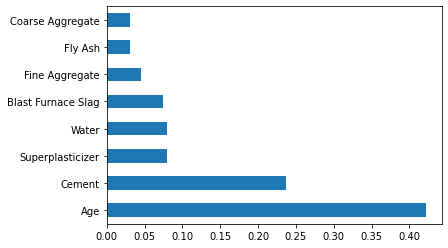

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=data.drop(['Strength'],axis=1).columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [23]:
data = data.drop(['Coarse Aggregate','Fly Ash'],axis=1)

In [24]:
data.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Fine Aggregate,Age,Strength
0,540.0,0.0,162.0,2.5,676.0,28,4.381902
1,540.0,0.0,162.0,2.5,676.0,28,4.125359
2,332.5,142.5,228.0,0.0,594.0,270,3.695607
3,332.5,142.5,228.0,0.0,594.0,365,3.714791
4,198.6,132.4,192.0,0.0,825.5,360,3.790985


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(['Strength'],axis=1),dataset['Strength'],test_size=0.1,random_state=32)

In [26]:
X_train.shape, X_test.shape

((927, 6), (103, 6))

In [27]:
X_train.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Fine Aggregate,Age
436,172.4,13.6,156.8,4.1,856.4,28
280,251.4,0.0,188.5,6.4,757.7,14
711,305.3,203.5,203.5,0.0,631.0,90
63,190.0,190.0,228.0,0.0,670.0,270
1026,322.2,0.0,196.0,10.4,813.4,28


In [28]:
y_train.head()

436     33.69
280     24.43
711     54.60
63      50.66
1026    31.18
Name: Strength, dtype: float64

In [29]:
print(len(X_train))
print(len(y_train))

927
927


In [30]:
data.to_csv('standardized_data2.csv',index=False)

In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [32]:
X = data.drop(['Strength'],axis=1)

In [33]:
y = data[['Strength']]

In [34]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [35]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True])

In [36]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 6
selected features: 6


In [37]:
selected_feat

Index(['Cement', 'Blast Furnace Slag', 'Water', 'Superplasticizer',
       'Fine Aggregate', 'Age'],
      dtype='object')

In [38]:
data.corr()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.081587,0.092386,-0.222718,0.081946,0.465979
Blast Furnace Slag,-0.275216,1.000000,0.107252,0.043270,-0.281603,-0.044246,0.097479
Water,-0.081587,0.107252,1.000000,-0.657533,-0.450661,0.277618,-0.242569
Superplasticizer,0.092386,0.043270,-0.657533,1.000000,0.222691,-0.192700,0.341475
Fine Aggregate,-0.222718,-0.281603,-0.450661,0.222691,1.000000,-0.156095,-0.192794
Age,0.081946,-0.044246,0.277618,-0.192700,-0.156095,1.000000,0.342551
Strength,0.465979,0.097479,-0.242569,0.341475,-0.192794,0.342551,1.000000


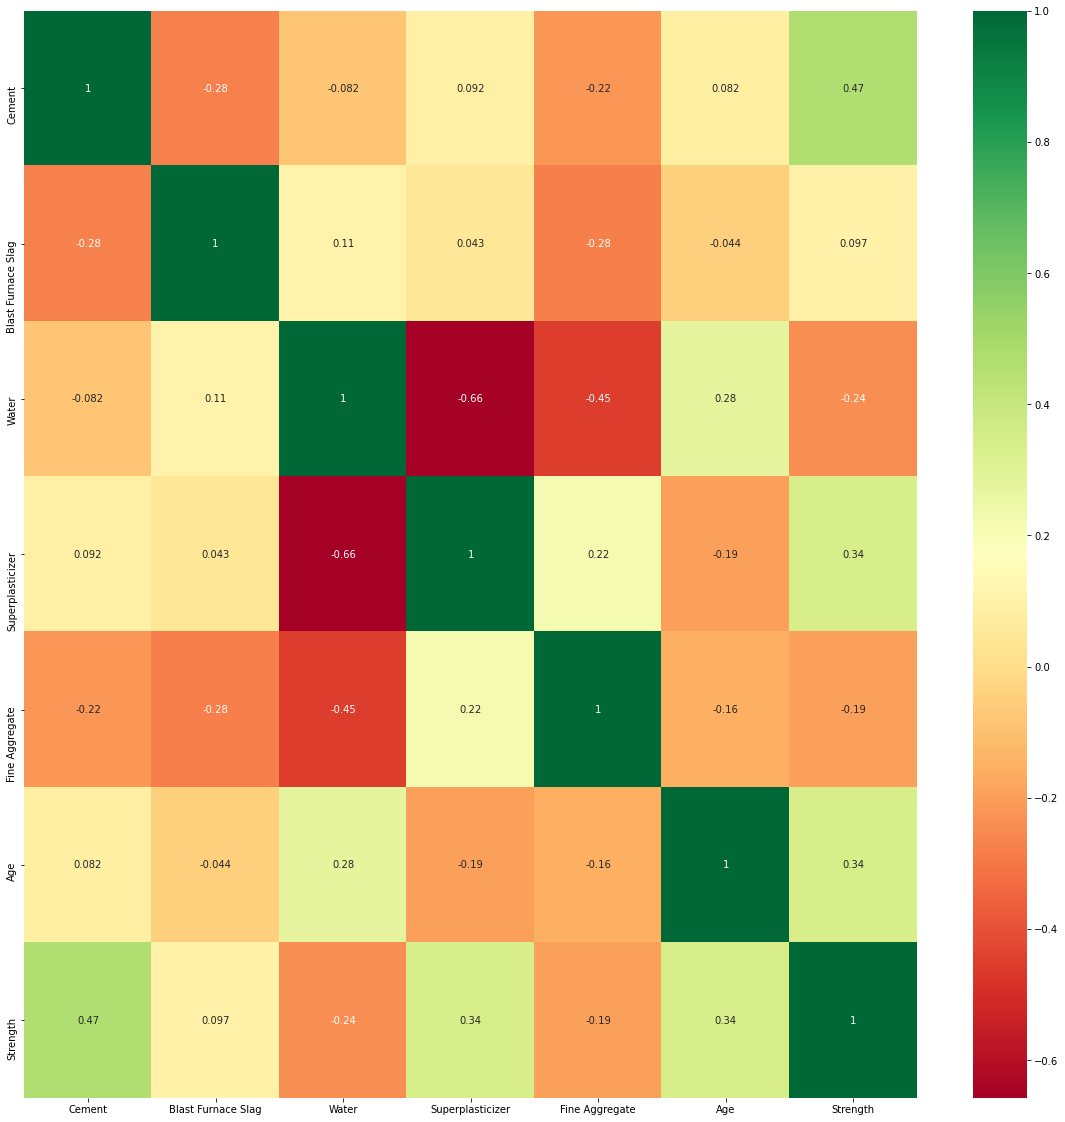

In [39]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Model buliding

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [41]:
model=xgb.XGBRegressor()

In [42]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
model.score(X_train,y_train)

0.9940257275953842

In [43]:
predictions=model.predict(X_test)

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Strength', ylabel='Density'>

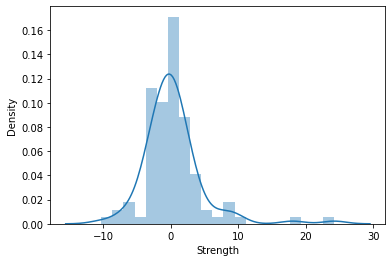

In [44]:
sns.distplot(y_test-predictions)

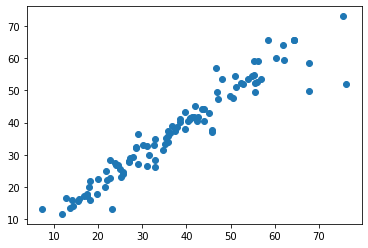

In [45]:
plt.scatter(y_test,predictions)

In [46]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.7194693748696332
MSE: 19.564544014678276
RMSE: 4.423182566283951


In [48]:
import pickle

In [49]:
filename = 'xgb_model.pkl'

In [50]:
pickle.dump(model, open(filename, 'wb'))

## Hyperparameter Tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [55]:
est = RandomForestRegressor(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [56]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [61]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 10, X_train, y_train)

In [62]:
rf_parameters

{'bootstrap': False,
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 400}

In [63]:
rf_ht_score

0.9131017022290836

In [64]:
model = RandomForestRegressor(bootstrap=False,
 max_depth= None,
 max_features= 2,
 min_samples_leaf= 1,
 n_estimators= 400)

In [65]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=400)

In [66]:
predictions=model.predict(X_test)

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Strength', ylabel='Density'>

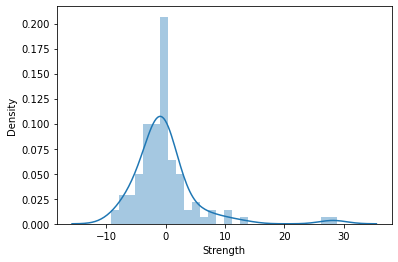

In [67]:
sns.distplot(y_test-predictions)

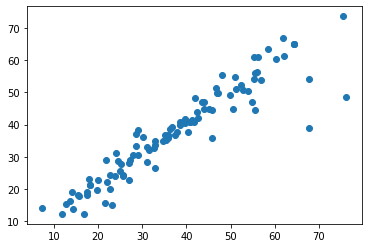

In [68]:
plt.scatter(y_test,predictions)

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.304673584142393
MSE: 30.669747300633183
RMSE: 5.538027383521427


In [52]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [54]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [55]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='neg_mean_absolute_error',n_jobs=-1,cv=5,verbose=3)

In [56]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 20.42 seconds.


In [57]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [60]:
model = xgb.XGBRegressor(min_child_weight= 3,
 max_depth= 6,
 learning_rate= 0.25,
 gamma= 0.1,
 colsample_bytree= 0.7)

In [62]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
predictions=model.predict(X_test)

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Strength', ylabel='Density'>

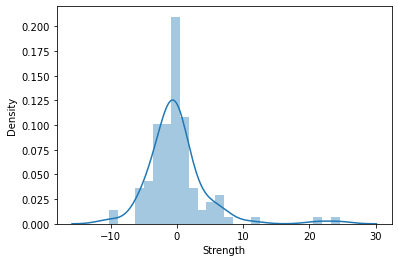

In [64]:
sns.distplot(y_test-predictions)

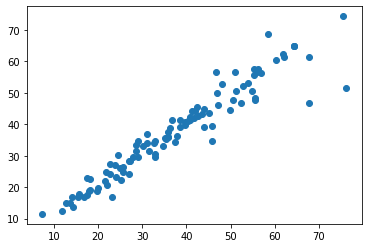

In [65]:
plt.scatter(y_test,predictions)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.8167189896222453
MSE: 21.535905233421072
RMSE: 4.6406793935178365


## Feature modelling

In [67]:
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [68]:
data.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Fine Aggregate,Age,Strength
0,540.0,0.0,162.0,2.5,676.0,28,4.381902
1,540.0,0.0,162.0,2.5,676.0,28,4.125359
2,332.5,142.5,228.0,0.0,594.0,270,3.695607
3,332.5,142.5,228.0,0.0,594.0,365,3.714791
4,198.6,132.4,192.0,0.0,825.5,360,3.790985


In [69]:
independent_features = list(data.columns)
independent_features.remove('Strength')
print(independent_features)

['Cement', 'Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate', 'Age']


In [70]:
mylist = []
def printSubsequences(arr, index, subarr): 
        
    # Print the subsequence when reach  
    # the leaf of recursion tree 
    if index == len(arr): 
            
        # Condition to avoid printing 
        # empty subsequence 
        if len(subarr) != 0: 
            mylist.append(subarr)
        
    else: 
        # Subsequence without including  
        # the element at current index 
        printSubsequences(arr, index + 1, subarr) 
            
        # Subsequence including the element 
        # at current index 
        printSubsequences(arr, index + 1,  
                            subarr+[arr[index]]) 
        
    return
            
arr = independent_features 
    
printSubsequences(arr, 0, []) 

In [71]:
for lists in mylist:
    print(lists)

['Age']
['Fine Aggregate']
['Fine Aggregate', 'Age']
['Superplasticizer']
['Superplasticizer', 'Age']
['Superplasticizer', 'Fine Aggregate']
['Superplasticizer', 'Fine Aggregate', 'Age']
['Water']
['Water', 'Age']
['Water', 'Fine Aggregate']
['Water', 'Fine Aggregate', 'Age']
['Water', 'Superplasticizer']
['Water', 'Superplasticizer', 'Age']
['Water', 'Superplasticizer', 'Fine Aggregate']
['Water', 'Superplasticizer', 'Fine Aggregate', 'Age']
['Blast Furnace Slag']
['Blast Furnace Slag', 'Age']
['Blast Furnace Slag', 'Fine Aggregate']
['Blast Furnace Slag', 'Fine Aggregate', 'Age']
['Blast Furnace Slag', 'Superplasticizer']
['Blast Furnace Slag', 'Superplasticizer', 'Age']
['Blast Furnace Slag', 'Superplasticizer', 'Fine Aggregate']
['Blast Furnace Slag', 'Superplasticizer', 'Fine Aggregate', 'Age']
['Blast Furnace Slag', 'Water']
['Blast Furnace Slag', 'Water', 'Age']
['Blast Furnace Slag', 'Water', 'Fine Aggregate']
['Blast Furnace Slag', 'Water', 'Fine Aggregate', 'Age']
['Blast Fur

In [72]:
print(len(mylist))

63


In [73]:
def best_features_model(features,x_train,x_test,y_train,y_test):
    model = xgb.XGBRegressor()
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    MAE =  metrics.mean_absolute_error(y_test, predictions)
    MSE =  metrics.mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    this_list = [MAE,MSE,RMSE]
    return this_list,features

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dataset.drop(['Strength'],axis=1),dataset['Strength'],test_size=0.1,random_state=32)

In [81]:
result = []
result2 = []

count = 0
for lists in mylist:
    outs1,outs2 = best_features_model(lists,X_train[lists],X_test[lists],Y_train,Y_test)
    result.append(outs1)
    result2.append(outs2)
    count += 1
    
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [82]:
minimum = min(result,key=lambda X:X[0])
print(minimum)
min_index = result.index(minimum)
print(result2[min_index])

[2.7194693748696332, 19.564544014678276, 4.423182566283951]
['Cement', 'Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate', 'Age']
